## 1.对Basket.csv文件进行数据分析

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
data1=open("C:/Users/xyr19/Desktop/python科学计算大作业/item-2018-06-01-2018-07-05.csv")
data2=open("C:/Users/xyr19/Desktop/python科学计算大作业/Basket-2018-06-01-2018-07-05.csv")
df1 = pd.read_csv(data1)
df2 = pd.read_csv(data2)
print(df1.head(5))
print(df2.head(5))

        SDATE STORE_CODE  POSID  BASK_CODE  PROD_CODE  ITEM_QUANTITY  \
0  2018-06-01       D007      3     250451      29405          1.000   
1  2018-06-01       D007      3     250451      13187          1.000   
2  2018-06-01       D007      3     250243     196249          1.000   
3  2018-06-01       D007      3     250243     199637          1.000   
4  2018-06-01       D007      1     160905     195012          3.222   

   ITEM_SPEND  NORMAL_PRICE DISCOUNT_TYPE  DISCOUNT_AMOUNT  
0        1.70           2.0             m             -0.3  
1        1.00           1.0             n              0.0  
2       99.00          99.0             m              0.0  
3        9.90          16.8             p             -6.9  
4       18.69           5.8             n              0.0  
  SHOP_DATETIME STORE_CODE  POS_NO  BASK_CODE  BASK_SPEND
0    2018-06-01       D007       3     250458         8.0
1    2018-06-01       D007       3     250200        32.7
2    2018-06-01       D007 

In [92]:
#统计两个csv文件是否存在缺失值。
df2.isnull().any()

SHOP_DATETIME    False
STORE_CODE       False
POS_NO           False
BASK_CODE        False
BASK_SPEND       False
dtype: bool

In [93]:
df1.isnull().any()

SDATE              False
STORE_CODE         False
POSID              False
BASK_CODE          False
PROD_CODE          False
ITEM_QUANTITY      False
ITEM_SPEND         False
NORMAL_PRICE       False
DISCOUNT_TYPE      False
DISCOUNT_AMOUNT    False
Sale               False
dtype: bool

In [2]:
#对basket列表日期进行排序
Basketdata = df2.sort_index(axis=0,by=["SHOP_DATETIME"])
print(Basketdata[25:30])

C:\Users\xyr19\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


       SHOP_DATETIME STORE_CODE  POS_NO  BASK_CODE  BASK_SPEND
215263    2018-06-01       D002       5     207961         1.5
215262    2018-06-01       D002       8      82213         8.5
215274    2018-06-01       D006       3     148745        34.9
215289    2018-06-01       D007       1     160912        56.0
215290    2018-06-01       D007       1     161147        11.8


In [26]:
# 统计商店的个数
store_counts=Basketdata.drop_duplicates(subset=['STORE_CODE'])
store_counts.shape[0]

24

In [95]:
# 统计每个商店销售额
sell =Basketdata.groupby(by="STORE_CODE")
df2_sell = sell["BASK_SPEND"].sum()
df2_sell

STORE_CODE
A001    3.435303e+06
A004    5.123467e+05
A006    9.383050e+05
A007    6.866382e+05
A008    1.311171e+06
A009    7.977389e+05
A010    6.448924e+05
A012    8.469747e+05
A013    1.117126e+06
A016    7.398143e+05
A017    3.945074e+05
A018    5.584417e+05
A019    6.486686e+05
A021    7.387401e+05
A022    4.874459e+05
D002    3.129447e+06
D003    2.435843e+05
D004    8.078603e+05
D005    5.541030e+05
D006    7.935042e+05
D007    1.361607e+06
D008    6.930078e+05
D009    4.704280e+05
D010    3.636179e+05
Name: BASK_SPEND, dtype: float64

In [96]:
#按日期统计总销售额
Dsell =Basketdata.groupby(by="SHOP_DATETIME")
data_sell2 = Dsell["BASK_SPEND"].sum()
data_sell2

SHOP_DATETIME
2018-06-01     717327.28
2018-06-02     727910.16
2018-06-03     682779.75
2018-06-04     557813.05
2018-06-05     663394.81
2018-06-06     498250.71
2018-06-07     436109.19
2018-06-08     564402.27
2018-06-09     679629.48
2018-06-10     702961.56
2018-06-11     532263.20
2018-06-12     569290.86
2018-06-13     722874.45
2018-06-14     615684.90
2018-06-15     774897.74
2018-06-16    1172798.62
2018-06-17    1506093.31
2018-06-18    1257825.41
2018-06-19     412881.99
2018-06-20     533702.81
2018-06-21     493064.51
2018-06-22     411610.22
2018-06-23     582622.57
2018-06-24     529053.77
2018-06-25     454961.04
2018-06-26     453298.13
2018-06-27     527871.74
2018-06-28     438126.70
2018-06-29     568749.99
2018-06-30     719873.69
2018-07-01     653284.63
2018-07-02     520731.01
2018-07-03     542603.77
2018-07-04     559139.42
2018-07-05     491390.33
Name: BASK_SPEND, dtype: float64

In [97]:
# 统计每个商店的pos机
S_pos =Basketdata.groupby(by="STORE_CODE")
Shop_pos = S_pos["POS_NO"]
Shop_pos.unique()

STORE_CODE
A001               [3, 9, 6, 2, 10, 1, 5, 4]
A004                               [2, 4, 1]
A006                               [2, 4, 1]
A007                               [1, 2, 8]
A008                      [1, 3, 8, 2, 6, 4]
A009                               [1, 2, 8]
A010                               [2, 8, 3]
A012                            [2, 3, 8, 1]
A013                         [6, 2, 4, 8, 1]
A016                               [1, 2, 3]
A017                                  [1, 8]
A018                               [1, 2, 4]
A019                               [1, 2, 3]
A021                            [2, 3, 4, 1]
A022                                  [2, 1]
D002    [5, 8, 4, 6, 1, 20, 13, 7, 2, 19, 9]
D003                                  [2, 1]
D004                               [2, 1, 4]
D005                               [2, 3, 4]
D006                               [2, 3, 1]
D007                            [3, 1, 8, 4]
D008                               [4, 1, 2]

In [98]:
#统计每个商店的购物篮个数
S_basket =Basketdata.groupby(by="STORE_CODE")
Shop_basket = S_basket["BASK_CODE"]
Shop_basket.unique()

STORE_CODE
A001    [25440, 25474, 25121, 25176, 266577, 229111, 2...
A004    [108542, 108376, 3043, 108240, 3045, 108290, 1...
A006    [290886, 143370, 143369, 290882, 291181, 29117...
A007    [116215, 115995, 116088, 116230, 116001, 11600...
A008    [271004, 163781, 163670, 163615, 163407, 27085...
A009    [244862, 244868, 50740, 244675, 244699, 244530...
A010    [259404, 259265, 258937, 259390, 259375, 25931...
A012    [282809, 282667, 112895, 282096, 282165, 11271...
A013    [150359, 150283, 150101, 194937, 150033, 15015...
A016    [78658, 78574, 78561, 78383, 78381, 78235, 787...
A017    [177521, 177505, 177504, 177490, 177390, 17738...
A018    [199163, 198913, 199055, 199064, 198886, 19890...
A019    [192017, 192069, 192072, 191687, 192019, 19176...
A021    [97476, 73060, 97463, 46475, 72992, 73070, 731...
A022    [56341, 10386, 56344, 56343, 56342, 56318, 560...
D002    [207961, 82213, 143621, 204453, 49301, 204410,...
D003    [52997, 53044, 53089, 53088, 53062, 53061, 532...
D00

In [99]:
#统计商品的种类
Shop_code = Basketdata["BASK_CODE"]
Shop_code.count()

571552

In [3]:
# 统计商店销售次数
shop_count=Basketdata["STORE_CODE"].value_counts()
shop_count

A001    66735
D002    63114
D007    37605
A008    36576
A013    30138
A006    28547
A012    25024
A009    21872
D004    21410
D008    21057
A021    20660
A010    19592
D006    18641
A016    18341
A007    18041
A019    17019
D009    15876
A018    15771
D005    15328
A022    15304
A004    13490
A017    12513
D010    11095
D003     7803
Name: STORE_CODE, dtype: int64

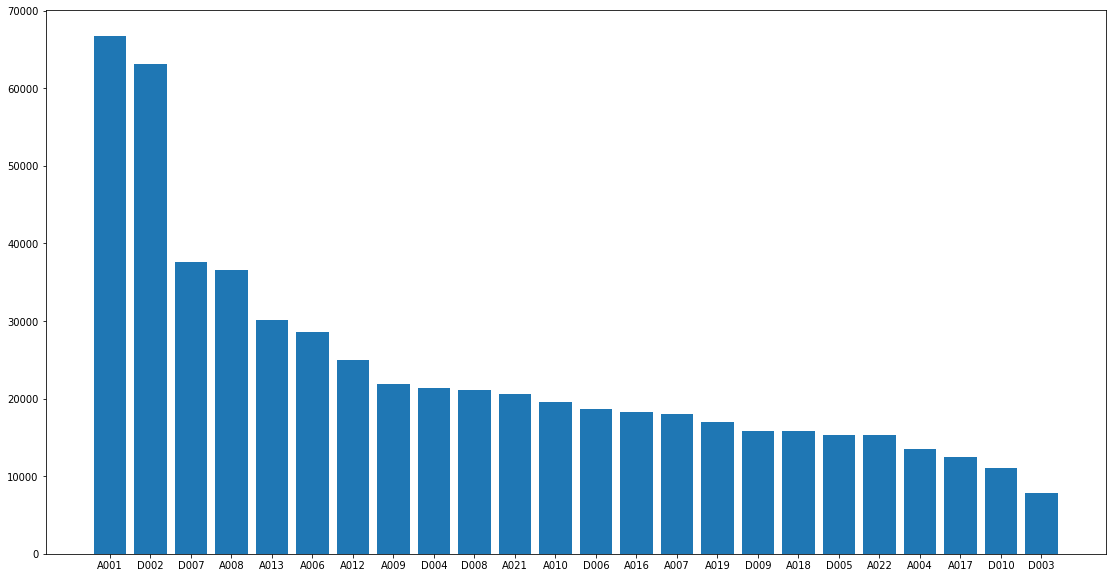

In [7]:
plt.bar(shop_count.index, shop_count.values)
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

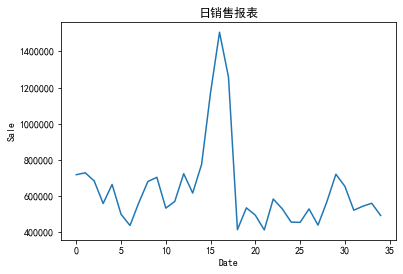

In [100]:
#绘制以日期为自变量，销售金额为因变量的函数图像
x = Basketdata.groupby(by="SHOP_DATETIME")
y = data_sell2.values
plt.plot(y)
plt.xlabel("Date")
plt.ylabel("Sale")
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.title("日销售报表")
plt.show

## 2.对item.csv文件进行分析

In [27]:
# 统计商店个数
store_counts1=df1.drop_duplicates(subset=['STORE_CODE'])
store_counts1.shape[0]

24

In [5]:
type(df1["DISCOUNT_AMOUNT"])

pandas.core.series.Series

In [7]:
#统计打折商品编号
print(df1["PROD_CODE"].count())
dazhe_prod = df1[df1["DISCOUNT_AMOUNT"].values != 0.]["PROD_CODE"]
print(dazhe_prod.count())

1732761
520629


#####   一共是1732761种商品，其中520629件是打折的

In [52]:
#商品数量是1的时候 打不打折
shengyige = df1[df1["ITEM_QUANTITY"].values == 1.000]["DISCOUNT_AMOUNT"]
print(shengyige.count())
print(shengyige.value_counts())

1380170
 0.00      967602
-1.00       36688
-1.60       24002
-2.00       21732
-3.00       15590
            ...  
-8.95           1
-12.80          1
-71.10          1
-27.50          1
-300.00         1
Name: DISCOUNT_AMOUNT, Length: 992, dtype: int64


#####  当商品的销售量为1时，一共1380170件，其中不打折的967602.想判断的是商品数量为1时与打折的关系，结论是关系不显著。

In [54]:
#当打折类型为n时，对应打了折扣的种类
dazheleixing = df1[df1["DISCOUNT_TYPE"] =="n"]["DISCOUNT_AMOUNT"]
print(dazheleixing.value_counts())

 0.00      1203233
-1.00          115
-1.60           70
-2.00           59
-20.00          58
            ...   
 6.50            1
-309.40          1
-5.06            1
-7.78            1
-1.14            1
Name: DISCOUNT_AMOUNT, Length: 1117, dtype: int64


##### 判断的是折扣种类m、n等与对应折扣的关系。发现当折扣类型为n时，最多的商品是打-1.00.

In [61]:
#商店编号为D007时 正常营业额的总金额 打折总金额
D007_actSale = df1[df1["STORE_CODE"] == "D007"]["ITEM_SPEND"]
print(D007_actSale.sum())
D007_BASKSPEND = df2[df2["STORE_CODE"] == "D007"]["BASK_SPEND"]
print(D007_BASKSPEND.sum())

1361606.5799999998
1361606.58


##### 比较了两个excel表的D007 BASK_SPEND和ITEM_SPEND的总和。 发现这两个变量总和是一样的。

In [68]:
df1["Sale"] = df1["ITEM_QUANTITY"].mul(df1["NORMAL_PRICE"]) #所有商店未打折前销售额
print(df1["Sale"].sum() )
D007_sale = df1[df1["STORE_CODE"] == "D007"]["Sale"] #D007未打折前销售额
print(D007_sale.sum())

29708338.211515706
1764679.2034406196


In [69]:
D007_dazhe_sum = 1764679.2034406196-1361606.58
print(D007_dazhe_sum)  #打折了40万元左右

403072.62344061956


#####  统计了D007商店的总销售额 以及总打折金额 得出打折总金额数40万+。

In [21]:
# 查看销量较高的商品
from pandas import to_datetime
data1=df1
data1_SDATE=to_datetime(data1["SDATE"],format="%Y/%m/%d")
data1.sort_values(by='SDATE', inplace=True)
newdata1 = data1.groupby(df1["PROD_CODE"])
newdata1

In [22]:
product_data1 = newdata1.sum()
product_data1

,POSID,BASK_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
PROD_CODE,,,,,,
19,51,1432102,13.0,496.7,505.7,-9.0
31,422,24662773,141.0,5184.9,5922.0,-737.1
33,49,2487295,15.0,613.5,613.5,0.0
36,133,8874084,52.0,1341.6,1341.6,0.0
39,437,13774376,83.0,406.7,406.7,0.0
...,...,...,...,...,...,...
224973,1,218136,1.0,33.8,33.8,0.0
224993,3,278501,1.0,14.5,14.5,0.0
225009,3,180867,1.0,9.9,9.9,0.0


In [25]:
product_data1.sort_values(by='ITEM_QUANTITY', inplace=True)
product_data1.tail(5)

,POSID,BASK_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
PROD_CODE,,,,,,
61623,9299,432402994,21756.0,38773.90,5045.666667,-863.40
7133,25559,452239151,23015.0,289616.00,107722.500000,-1129.00
220834,4525,252513985,25644.0,127344.90,8496.950001,-8486.00
86772,8864,522212146,31252.0,65720.30,8205.333333,-12185.70
149413,6909,379230477,39823.0,173332.43,12044.533338,-22517.67


##### 商品销售数量最高的编号61623

## 绘制图像

In [34]:
#画图 商店为横坐标 销售额为纵坐标的柱状图
import matplotlib.pyplot as plt
Date_store = df1.groupby(['STORE_CODE', 'SDATE']).size()
Date_A001 = Date_store["A001"]
Date_A001_dict= {'SDATE': Date_A001.index,'COUNT': Date_A001.values}
Date_A001 = pd.DataFrame(Date_A001_dict)
Date_A001["SDATE"] = Date_A001['SDATE'].apply(lambda x:x.strftime('%Y.%m.%d'))
Date_A001 = Date_A001.set_index('SDATE')

In [90]:
Date_D003  = Date_store['D003']
Date_D003_dict= {'SDATE': Date_D003.index,'COUNT': Date_D003.values}
Date_D003 = pd.DataFrame(Date_D003_dict)
Date_D003['SDATE'] = Date_D003['SDATE'].apply(lambda x:x.strftime('%Y.%m.%d'))
Date_D003 = Date_D003.set_index('SDATE')

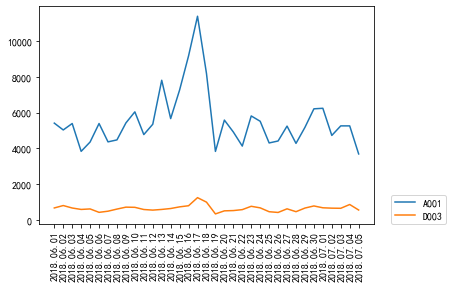

In [91]:
fig1, = plt.plot(Date_A001.index, Date_A001.values)
plt.xticks(Date_A001.index, rotation=90)
fig2, = plt.plot(Date_D003.index, Date_D003.values)
plt.legend([fig1, fig2], ['A001', 'D003'], bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
plt.show()

In [ ]:
#从6月1号至7月5号每天的销售金额排序
#对应时间相加
data = df2.groupby(df2.SHOP_DATETIME)
day_data = data.sum()

In [ ]:
from pylab import mpl
plt.plot(day_data['BASK_SPEND'])
plt.title('日均销售额')
plt.xlabel('日期')
plt.ylabel('销售金额')
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.show()